# Prática com Classificação de Dados

Neste notebook trabalhamos os conceitos aprendidos ao analisar um dataset que contem dados sobre células que representam, ou não, câncer de mama.

## Importando as bibliotecas necessárias e realizando o tratamento inicial dos dados

A partir de agora, utilizaremos a biblioteca Scikit-Learn (`sklearn`) https://scikit-learn.org/stable/getting_started.html, que provê ferramentas simples e eficientes para análises de predição de dados.

Em nosso exemplo, a última coluna do dataset, `Class`, indica `0` se não é câncer ou `1` se é câncer.

Nosso objetivo é ler os dados, efetuar tratamento dos dados (e.g., verificar se há algum dado faltante e/ou realizar sua remoção.

Note que nem sempre **remover** toda uma linha de um dataset por conta da ausência de um único dado nela é a melhor estratégia, pois os demais que serão excluídos *poderiam* ser úteis no treinamento do modelo para predizer o que se deseja. Nesses casos, uma opção é substituir valores ausentes pela média dos demais da mesma coluna (uma possível estrategia), mas note que isso só funciona para valores numéricos.

Para efeitos de simplicidade deste exemplo, vamos apenas deletar as linhas.

In [ ]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score


## Upload e tratamento dos dados


In [7]:
import os

uploaded = r"E:\Github\unicamp-engenharia-banco-de-dados\12 - Mineração de Dados\Python\Classificação\BreastCancer.csv"

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [8]:
df = pd.read_csv("BreastCancer.csv")
df

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,0
695,841769,2,1,1,1,2,1.0,1,1,1,0
696,888820,5,10,10,3,7,3.0,8,10,2,1
697,897471,4,8,6,4,3,4.0,10,6,1,1


In [9]:
df.isnull().sum()

Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [10]:
#removemos linhas com valores nulos
df = df.dropna()
df

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,0
695,841769,2,1,1,1,2,1.0,1,1,1,0
696,888820,5,10,10,3,7,3.0,8,10,2,1
697,897471,4,8,6,4,3,4.0,10,6,1,1


## Classificação

Com os dados tratados, nosso objetivo agora é construir as variáveis $X$ e $y$, sendo que o processo de classificação se resume em estimar a função $f$ na relação $y = f(X) + \epsilon$, onde $\epsilon$ é o erro, que tem distribuição normal com média igual a zero e variância $\sigma^2$.

### Identificando quais valores são úteis para a classificação

Algumas vezes (ou quase sempre) os datasets podem contar dados que não nos ajudam na classificação que desejamos obter. Vamos dar uma olhada novamente.

In [11]:
df.describe()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


Note que esse campo `Id` está representado como um número, mas seu objetivo é dar um identificador pra cada linha, como se fosse um nome. Esse tipo de dado não é útil na classificação e, neste caso, ainda mais grave, o formato numérico atrapalharia ainda mais o processo. Vamos remover a coluna `Id` mesmo que ela não contenha linhas N/A.

In [12]:
df = df.drop(['Id'], axis=1)
df

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,0
695,2,1,1,1,2,1.0,1,1,1,0
696,5,10,10,3,7,3.0,8,10,2,1
697,4,8,6,4,3,4.0,10,6,1,1


### Definindo os conjuntos de dados

Precisamos indicar quais dados serão usados para predizer o valor desejado. Chamaremos de `FEATURES` os utilizados na função $F(x)$ e `CLASS` o $f$ estimado.

In [13]:
FEATURES = df.columns[:-1] # todas as colunas exceto a última, "Class"
CLASS = df.columns[-1]     # apenas a última coluna

print(FEATURES)
print(CLASS)

Index(['Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion',
       'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli',
       'Mitoses'],
      dtype='object')
Class


Feito isso, agora precisamos dividir nosso dataset em partes para treino e para teste. Isso pode ser feito utilizando o método `train_test_split()`.

Vamos separar nosso conjunto em 80% para **treino** e 20% para **teste**.

In [14]:
X = df[FEATURES]
y = df[CLASS]

test_size = 0.2 # indica que 20% dos dados serão usados para teste

#random_state: Controla o embaralhamento aplicado aos dados antes de aplicar a divisão. Passe um int para saída reproduzível em várias chamadas de função.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42,
                                                    test_size = test_size)

A partir desse conjunto de dados, podemos realizar a classificação.

## Árvores de Decisão

Árvores de decisão podem ser construidas de diferentes formas, considerando diferentes métodos e medidas, como vimos na aula.

### Critério Gini

Vamos incialmente construir a árvore usando o critério Gini:

In [15]:
# Cria o modelo usando o criterio Gini
#Medidas comuns de impureza
#criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
model = tree.DecisionTreeClassifier(criterion = 'gini',
                                    random_state = 101)

# Ajusta o modelo usando os dados de treinamento
model.fit(X_train,y_train)

# Realiza a predição no conjunto de teste
y_pred = model.predict(X_test)

Vamos visualizar a árvore usando a matplotlib:

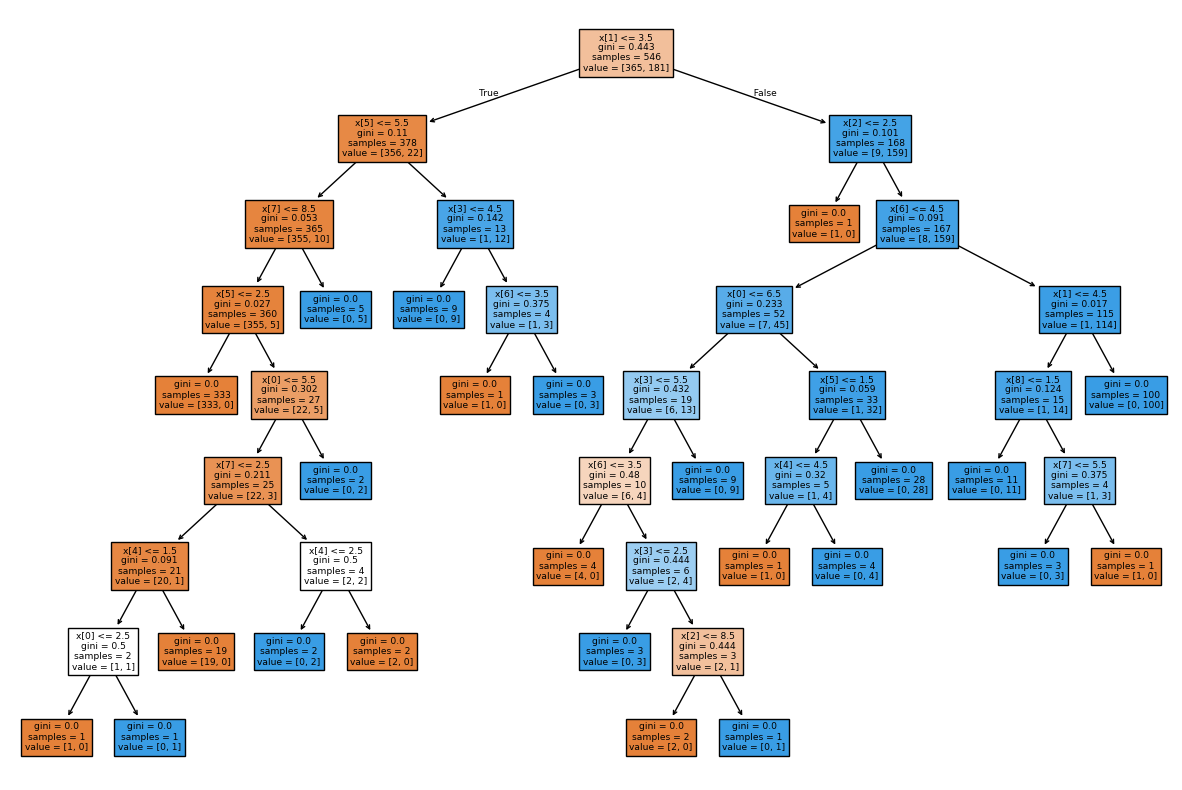

In [16]:
plt.figure(figsize=(15, 10))
tree.plot_tree(model.fit(X_train,y_train), filled=True)
plt.show(True)

Usando a medida de acurácia, avaliamos o desempenho do modelo no aprendizado.

In [17]:
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score)

Accuracy: 0.9343065693430657


### Critério de Entropia

Se usarmos a medida de entropia:

In [18]:
model = tree.DecisionTreeClassifier(criterion = 'entropy',
                                    random_state = 101)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

Temos a seguinte árvore:

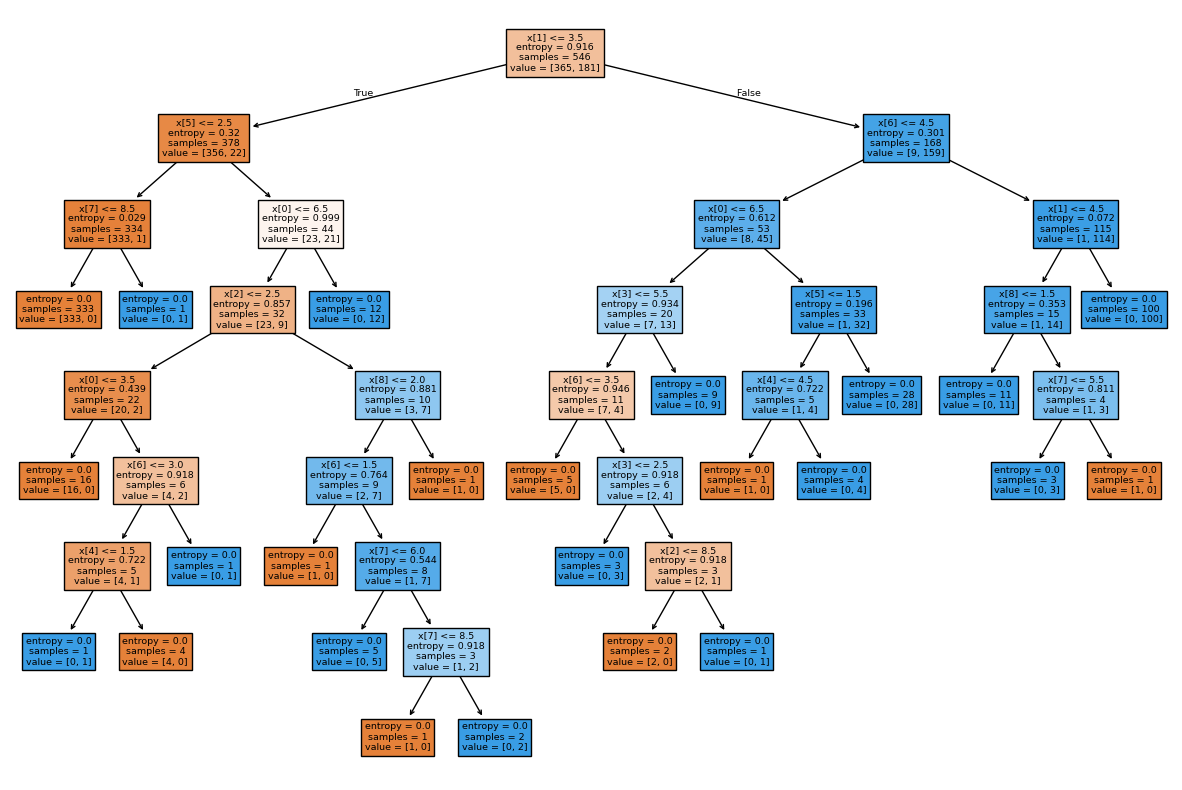

In [19]:
plt.figure(figsize=(15,10))
tree.plot_tree(model.fit(X_train,y_train), filled=True)
plt.show(True)

Com a seguinte acurácia:

In [20]:
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score)

Accuracy: 0.9635036496350365


Podemos também limitar o tamanho da árvore, o que influencia no resultado. Quem controla esse tamanho é o hiperparâmetro `max_depth`.

In [21]:
# cria o modelo com número máximo de níveis max_depth
model = tree.DecisionTreeClassifier(criterion = 'entropy',
                                    max_depth = 2)

# ajusta aos dados de treinamento
model.fit(X_train,y_train)

# faz a predição usando os dados de teste
y_pred = model.predict(X_test)

Visualizando a estrutura da árvore, vemos que há menos níveis do que a anterior.

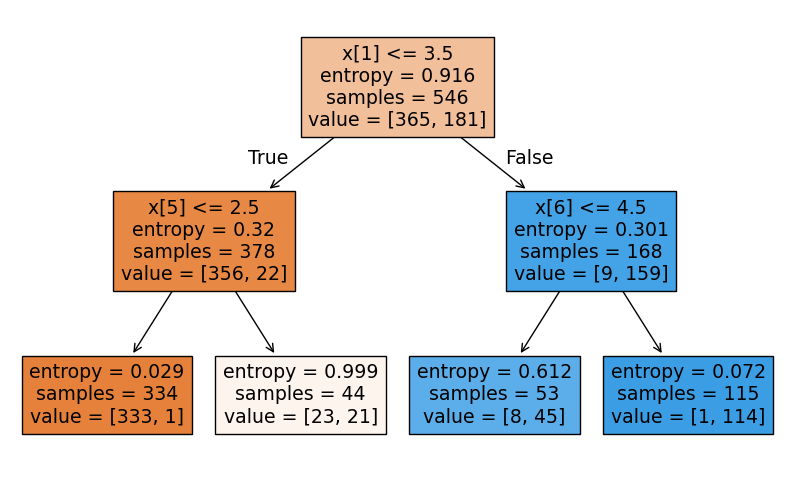

In [22]:
plt.figure(figsize=(10,6))
tree.plot_tree(model.fit(X_train, y_train), filled=True)
plt.show(True)

E podemos ver como isso impacta no resultado ao recalcular a acurácia:

In [23]:
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score)

Accuracy: 0.8759124087591241


## Avaliando a Classificação

Com a predição, podemos fazer a avaliação dos resultados usando diferentes métricas além da acurácia.

In [24]:
# Resgatando os valores com o critério Gini

# Cria o modelo usando o criterio Gini
model = tree.DecisionTreeClassifier(criterion = 'gini',
                                    random_state = 101)

# Ajusta o modelo usando os dados de treinamento
model.fit(X_train,y_train)

# Realiza a predição
y_pred = model.predict(X_test)

### Matriz de Confusão

A matriz de confusão (*confusion matrix*) permite verificar a relação entre as classes preditos e os originais.

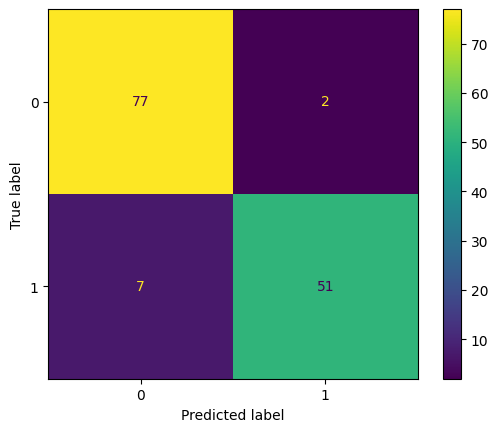

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred,
            rownames=['True'],
            colnames=['Predicted'],
            margins=True)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

### F1-Score, Precision e Recall

Estas são outras métricas que podem quantificar a qualidade de uma classificação.

A medida F1 é a média harmônica entre as medidas Precision e Recall:
$$
    {\displaystyle F_{1}={\frac {2}{\mathrm {recall} ^{-1}+\mathrm {precision} ^{-1}}}=2{\frac {\mathrm {precision} \cdot \mathrm {recall} }{\mathrm {precision} +\mathrm {recall} }}={\frac {2\mathrm {tp} }{2\mathrm {tp} +\mathrm {fp} +\mathrm {fn} }}}.
$$
Se a Precision ou a Recall é igual a zero, então F1 será zero, pois o denominador será igual a infinito. Se forem iguais a um, então F1 também será igual a 1, indicando uma clasificação sem erro.

No report, suporte é quantas amostras existem em cada classe

In [26]:
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))
print('\n clasification report:\n', classification_report(y_test, y_pred))



Accuracy: 0.9343065693430657
F1-score: 0.9318520974962693
Precision: 0.9394654088050314
Recall: 0.9269969445656918

 clasification report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94        79
           1       0.96      0.88      0.92        58

    accuracy                           0.93       137
   macro avg       0.94      0.93      0.93       137
weighted avg       0.94      0.93      0.93       137



### Medida AUC

Podemos calcular também a medida AUC (área sob a curva ROC). A AUC é uma medida útil para comparar o desempenho de dois modelos diferentes, desde que o conjunto de dados esteja mais equilibrado.

In [27]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print('AUC:', auc)

AUC: 0.9269969445656918


Exemplo usando validação cruzada (k-fold)

Cross-validation accuracy scores: [0.9  0.95 1.   0.95 0.95]
Mean accuracy: 0.9500


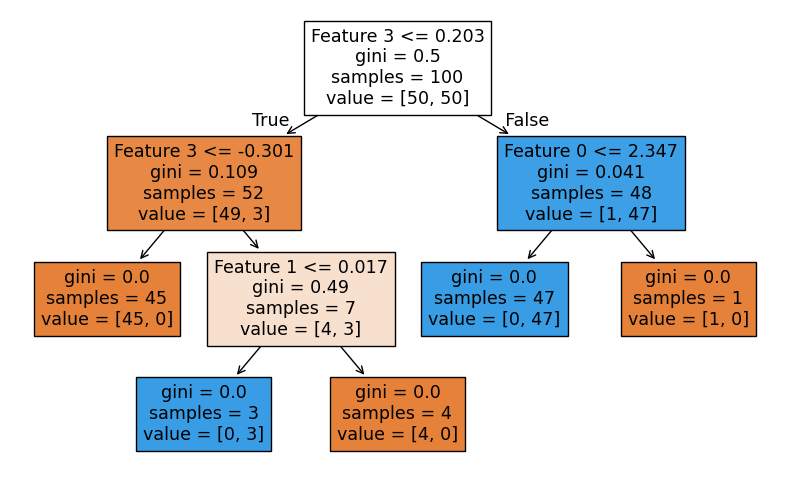

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Generate a small synthetic dataset
X, y = make_classification(n_samples=100, n_features=4, n_classes=2, random_state=42)

# Step 2: Define the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Step 3: Define k-fold cross-validation (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Perform cross-validation and get accuracy scores
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Step 5: Print the results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.4f}")

# Step 6: Train on the full dataset
model.fit(X, y)

# Step 7: (Optional)  Visualize the decision tree - Plot the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=[f'Feature {i}' for i in range(X.shape[1])])
plt.show()


Exemplo de ROC AUC plot

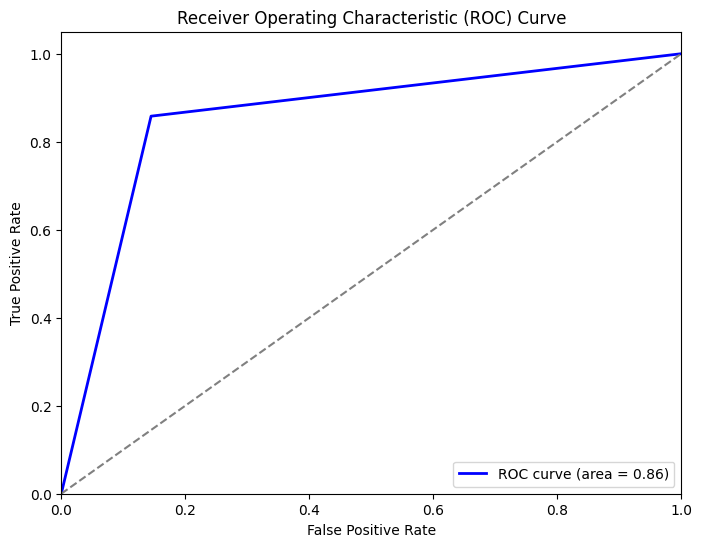

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

# Gerar dados fictícios para um problema de classificação binária
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar um classificador (Árvore de Decisão Binária)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Obter as probabilidades preditas para a classe positiva
y_scores = clf.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha de referência
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Exemplo de ROC AUC com RandomForestClassifier

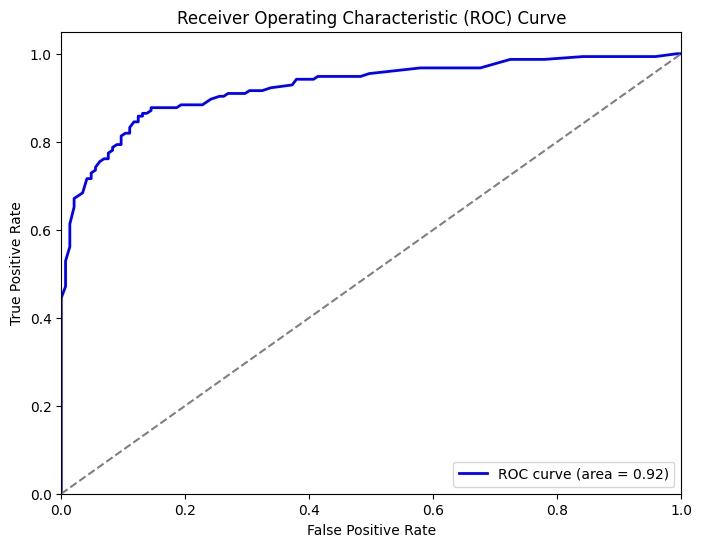

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Gerar dados fictícios para um problema de classificação binária
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar um classificador (RandomForest como exemplo)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Obter as probabilidades preditas para a classe positiva
y_scores = clf.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha de referência
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
